# Project: Wrangling and Analyze Data

## Register with Tweeter and apply for enhanced developer rights

Establish connectivity with Twitter

In [467]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXX-XXX'
access_secret = 'XXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [31]:
try:
    api.verify_credentials()
    print("Authentication OK")
except Exception as e:
    print("Error during authentication", e)


Authentication OK


# Gather Data

## Read the tweets archive data file & image prediction file from provided URL

After writing the data to csv file, read the file as dataframe and then pull the tweets data (as json) from twitter 
using tweepy (Twitter API). Use tweet_id to pull the data using tweepy and write to tweet_json.txt file.

In [483]:
pd.options.mode.chained_assignment = None

In [484]:
url_tweet = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
url_image = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"


In [485]:
import requests

response_tweet = requests.get(url_tweet)
response_image = requests.get(url_image)

with open ('twitter-archive-enhanced.csv', mode ='wb') as file:
    file.write(response_tweet.content)

with open ('image-prediction.tsv', mode ='wb') as file:
    file.write(response_image.content)

In [486]:
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [487]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [488]:
df_image = pd.read_csv("image-prediction.tsv", sep='\t')

df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [489]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### From Udacity Project:

So for the last row in that table:

tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921

p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever

p1_conf is how confident the algorithm is in its #1 prediction → 95%

p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

p2 is the algorithm's second most likely prediction → Labrador retriever

p2_conf is how confident the algorithm is in its #2 prediction → 1%

p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [490]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

AttributeError: 'DataFrame' object has no attribute 'tweet_id'

In [491]:
# Read the json data from tweet_json.txt
df_tweets = pd.read_json("tweet_json.txt", lines=True)

In [492]:
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [493]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [494]:
# From all the columns only id, retweet_count, favorite_count are looking interesting with quantitative value.
# Extract of these columns in another dataframe
df_tweets_sub = df_tweets[['id', 'retweet_count', 'favorite_count']]

# Rename column(s) to align them with other DF
df_tweets_sub.rename(columns={'id':'tweet_id'}, inplace=True)

In [495]:
df_tweets_sub.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7079,34143
1,892177421306343426,5344,29619
2,891815181378084864,3514,22306
3,891689557279858688,7285,37319
4,891327558926688256,7822,35656


In [496]:
df_tweets_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [497]:
# Check if there are any duplicate tweets in all the gathered data
print("Are there any duplicate Tweet ID in archived tweets data file (df_twitter_archive)? {}".
      format(df_twitter_archive.duplicated(subset=['tweet_id']).any()))
print("Are there any duplicate Tweet ID in download tweets json data (df_image)? {}".
      format(df_image.duplicated(subset=['tweet_id']).any()))
print("Are there any duplicate Tweet ID in image tweets data (df_tweets_sub)? {}".
      format(df_tweets_sub.duplicated(subset=['tweet_id']).any()))

Are there any duplicate Tweet ID in archived tweets data file (df_twitter_archive)? False
Are there any duplicate Tweet ID in download tweets json data (df_image)? False
Are there any duplicate Tweet ID in image tweets data (df_tweets_sub)? False


In [498]:
# Number of Tweets missing URL in Archive Dataset
df_twitter_archive.expanded_urls.isna().sum()

59

In [499]:
# Number of tweets with missing urls that are replies or retweets
sum(df_twitter_archive.expanded_urls.isna() & \
    (df_twitter_archive.in_reply_to_status_id.notnull() | \
     df_twitter_archive.retweeted_status_id.notnull()))

56

In [500]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [501]:
# Get a sample record
df_twitter_archive.iloc[5]

tweet_id                                                     891087950875897856
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-29 00:08:17 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have a majestic great white breaching ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891087950...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [502]:
# How many tweets are original tweets, and not replies or retweets?
print("Total number of original tweets are {} out of {}. Number of retwets are {}. Number of replies are {}."
      .format(
      sum(df_twitter_archive.retweeted_status_id.isna() & df_twitter_archive.in_reply_to_status_id.isna()), 
      df_twitter_archive.shape[0],
      df_twitter_archive.shape[0] - df_twitter_archive.retweeted_status_id.isna().sum(),
      df_twitter_archive.shape[0] - df_twitter_archive.in_reply_to_status_id.isna().sum()))

Total number of original tweets are 2097 out of 2356. Number of retwets are 181. Number of replies are 78.


In [503]:
df_twitter_archive[df_twitter_archive.retweeted_status_id.isna() & 
                   df_twitter_archive.in_reply_to_status_id.isna()].rating_denominator.value_counts()


10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [504]:
# Tweet IDs where rating denominator is not 10
temp_df = df_twitter_archive[df_twitter_archive.retweeted_status_id.isna() & 
                   df_twitter_archive.in_reply_to_status_id.isna()]
temp_df[temp_df.rating_denominator != 10].tweet_id

433     820690176645140481
516     810984652412424192
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1635    684222868335505415
1662    682962037429899265
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [505]:
# Tweet IDs where rating numerator is not greater than 10
print("Number of tweets having numerator is less than or equal to 10: {}".format(temp_df[temp_df.rating_numerator <= 10].shape[0]))
temp_df[temp_df.rating_numerator <= 10].tweet_id

Number of tweets having numerator is less than or equal to 10: 855


45      883482846933004288
229     848212111729840128
232     847962785489326080
275     840696689258311684
315     835152434251116546
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 855, dtype: int64

In [506]:
temp_df.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2097, dtype: object

In [507]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
1. Twitter Archive: Timestamp column is of object datatype instead of datetime or timestamp.

2. Twitter Archive: We are only interested in Original Tweets which are only 2097 out of 2356. 181 tweets are retweets and 78 are replies.

3. Twitter Archive: Rating Denominator should be 10 but there out of 2097 original tweets 17 tweets have denominator that is not 10. 

4. Twitter Archive: Rating Numerator should be greater than 10 but there are 855 original tweets where it is not.

5. Twitter Archive: There are 4 columns for displaying the dog stage - doggo, floofer, pupper, and puppo. These can be part of only one column as this is categorical data.

6. Twitter Archive: Some of the dogs have invalid name like, "a", "None" etc.

7. Image Prediction: Total number of tweets in the dataframe is 2075 which is 281 tweets less than twitter archive. 

8. Json Data: 23 of all the tweets provided in Archive are deleted (Tweepy Exception: 22 File Not Found Error and for one tweet I am not authorized to download)

### Tidiness issues
1. Twitter Archive: Following 4 columns can be made as single columns (as categorical) - doggo, floofer, pupper, and puppo

2. Twitter Archive: Rating Denominator can be dropped when value remain static as 10

3. Twitter Archive: We only need original tweets, and following columns can be dropped as they don't provide any value as such - in_reply_to_status_id, in_reply_to_user_id, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls

4. Twitter Archive: timestamp column datatype change and we can add Year and Month as separate column which can be used for various analysis

5. Image Prediction: Get the final dog_breed using p1_dog, p2_dog and p3_dog. Choose the breed based on first True value of these 3 columms

6. Json Data: This can be combined with Twitter Archive with following columns - retweet_count, favorite_count. Key used to combine is id (tweet_id)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Issue #1:  Twitter Archive Dataframe copied to temp_df. Following issues to be addressed:

1. Twitter Archive: Following 4 columns can be made as single columns (as categorical) - doggo, floofer, pupper, and puppo

2. Twitter Archive: Rating Denominator can be dropped when value remain static as 10

3. Twitter Archive: We only need original tweets, and following columns can be dropped as they don't provide any value as such - in_reply_to_status_id, in_reply_to_user_id, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls

4. Twitter Archive: timestamp column datatype change and we can add Year and Month as separate column which can be used for various analysis



#### Define:


#### Code

In [508]:
temp_df.drop(['in_reply_to_status_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls'], 
             inplace=True, axis=1)

In [509]:
temp_df["doggo"] = temp_df["doggo"].str.replace('None', '')
temp_df["floofer"] = temp_df["floofer"].str.replace('None', '')
temp_df["pupper"] = temp_df["pupper"].str.replace('None', '')
temp_df["puppo"] = temp_df["puppo"].str.replace('None', '')

In [510]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   rating_numerator    2097 non-null   int64 
 3   rating_denominator  2097 non-null   int64 
 4   name                2097 non-null   object
 5   doggo               2097 non-null   object
 6   floofer             2097 non-null   object
 7   pupper              2097 non-null   object
 8   puppo               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [511]:
# Concat all the values of 4 columns into one new column with name dog_stage
temp_df['dog_stage'] = temp_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis= 1)

In [512]:
temp_df.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [513]:
# Drop the 4 columns as they are redundant
temp_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [514]:
# Convert timestamp datatype from string to datetime
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'])

In [515]:
# Enrich dateframe with year and month information
temp_df['year'] = temp_df['timestamp'].dt.year
temp_df['month'] = temp_df['timestamp'].dt.month
temp_df['month_year'] = pd.to_datetime(temp_df['timestamp']).dt.to_period('M')

/Users/ajaykumar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [516]:
temp_df['day'] = temp_df['timestamp'].dt.day

In [517]:
#Drop the timestamp column
temp_df.drop(['timestamp'], axis=1, inplace=True)

In [518]:
# Drop all the rows where rating denominator is not 10 and rating numerator is not greater than 10.
indexNames = temp_df[(temp_df['rating_denominator'] != 10) | (temp_df['rating_numerator'] < 11) ].index
temp_df.drop(indexNames , inplace=True)

In [519]:
# Since rating denominator value is always going to be 10, it can be dropped
temp_df.drop(['rating_denominator'], axis=1, inplace=True)

In [520]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 2339
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   tweet_id          1229 non-null   int64    
 1   rating_numerator  1229 non-null   int64    
 2   name              1229 non-null   object   
 3   dog_stage         1229 non-null   object   
 4   year              1229 non-null   int64    
 5   month             1229 non-null   int64    
 6   month_year        1229 non-null   period[M]
 7   day               1229 non-null   int64    
dtypes: int64(5), object(2), period[M](1)
memory usage: 86.4+ KB


In [521]:
temp_df.shape

(1229, 8)

### Test

In [522]:
temp_df.head()

,tweet_id,rating_numerator,name,dog_stage,year,month,month_year,day
0,892420643555336193,13,Phineas,,2017,8,2017-08,1
1,892177421306343426,13,Tilly,,2017,8,2017-08,1
2,891815181378084864,12,Archie,,2017,7,2017-07,31
3,891689557279858688,13,Darla,,2017,7,2017-07,30
4,891327558926688256,12,Franklin,,2017,7,2017-07,29


### Issue #2: 
Image Prediction: Choose the final dog breed based on 3 different prediction
Twitter JSON: Take only relevant data


#### Define: 
Get the final dog_breed using p1_dog, p2_dog and p3_dog. Choose the breed based on first True value of these 3 columms


#### Code

In [523]:
# Create a copy of impage prediction
df_image_temp = df_image.copy()

In [524]:
# Define a function to get the final dog breed and it's prediction value
dog_breed = []
dog_prediction_score = []

def get_final_dog_value(df_image_temp):
    if df_image_temp['p1_dog'] == True:
        dog_breed.append(df_image_temp['p1'])
        dog_prediction_score.append(df_image_temp['p1_conf'])
    elif df_image_temp['p2_dog'] == True:
        dog_breed.append(df_image_temp['p2'])
        dog_prediction_score.append(df_image_temp['p2_conf'])
    elif df_image_temp['p3_dog'] == True:
        dog_breed.append(df_image_temp['p3'])
        dog_prediction_score.append(df_image_temp['p3_conf'])
    else:
        dog_breed.append('Unknown')
        dog_prediction_score.append(0.0)
        

In [525]:
# Add 2 new columns
df_image_temp.apply(get_final_dog_value, axis=1)

df_image_temp['dog_breed'] = dog_breed
df_image_temp['dog_prediction_score'] = dog_prediction_score

In [526]:
# Drop p1*, p2* and p3* columns
df_image_temp.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], 
                   axis=1, 
                   inplace=True)


### Test

In [527]:
df_tweets_sub.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7079,34143
1,892177421306343426,5344,29619
2,891815181378084864,3514,22306
3,891689557279858688,7285,37319
4,891327558926688256,7822,35656


In [528]:
df_image_temp.head()

,tweet_id,jpg_url,dog_breed,dog_prediction_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [529]:
# Join Twitter Archive with Json Data (sub)
temp_df = temp_df.merge(df_tweets_sub, on='tweet_id')

In [530]:
# Now join Twitter Archive with Cleaned up Image Pediction
rate_dogs = temp_df.merge(df_image_temp, on='tweet_id')

In [531]:
rate_dogs.head()

,tweet_id,rating_numerator,name,dog_stage,year,month,month_year,day,retweet_count,favorite_count,jpg_url,dog_breed,dog_prediction_score
0,892420643555336193,13,Phineas,,2017,8,2017-08,1,7079,34143,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,13,Tilly,,2017,8,2017-08,1,5344,29619,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,12,Archie,,2017,7,2017-07,31,3514,22306,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,13,Darla,,2017,7,2017-07,30,7285,37319,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,12,Franklin,,2017,7,2017-07,29,7822,35656,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [532]:
rate_dogs.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [533]:
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1122
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   tweet_id              1123 non-null   int64    
 1   rating_numerator      1123 non-null   int64    
 2   name                  1123 non-null   object   
 3   dog_stage             1123 non-null   object   
 4   year                  1123 non-null   int64    
 5   month                 1123 non-null   int64    
 6   month_year            1123 non-null   period[M]
 7   day                   1123 non-null   int64    
 8   retweet_count         1123 non-null   int64    
 9   favorite_count        1123 non-null   int64    
 10  jpg_url               1123 non-null   object   
 11  dog_breed             1123 non-null   object   
 12  dog_prediction_score  1123 non-null   float64  
dtypes: float64(1), int64(7), object(4), period[M](1)
memory usage: 122.8+ KB


In [534]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [535]:
top10_dog_breeds_count = rate_dogs[rate_dogs.dog_breed != 'Unknown'].dog_breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_dog_breeds_count)

top10_per = round(sum(top10_dog_breeds_count) * 100 / rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      122
Pembroke               78
Labrador_retriever     70
Chihuahua              48
chow                   37
toy_poodle             35
Samoyed                35
Pomeranian             29
pug                    25
cocker_spaniel         22
Name: dog_breed, dtype: int64

Top 10 dog breeds make up 45% of all tweets


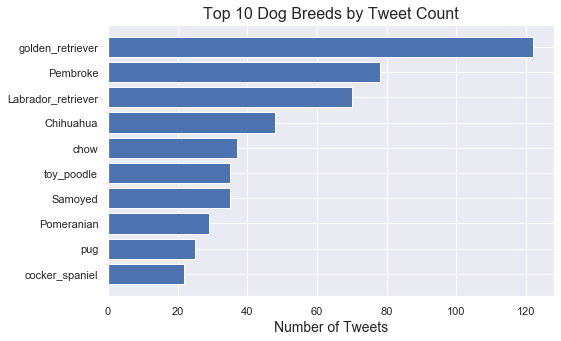

In [536]:
plt.barh(top10_dog_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

In [537]:
fav_counts_dog_breed = rate_dogs[rate_dogs.dog_breed != 'Unknown']
fav_counts_dog_breed = fav_counts_dog_breed.groupby(['dog_breed'])
fav_counts_dog_breed = fav_counts_dog_breed['favorite_count'].sum()
fav_counts_dog_breed = fav_counts_dog_breed.sort_values(ascending = False)
top10_dog_breeds_fav_counts = fav_counts_dog_breed.head(10)
top10_dog_breeds_fav_counts

dog_breed
golden_retriever      1503010
Pembroke               879996
Labrador_retriever     878926
Chihuahua              578924
French_bulldog         501278
Samoyed                472399
chow                   344579
cocker_spaniel         342859
malamute               256365
pug                    256262
Name: favorite_count, dtype: int64

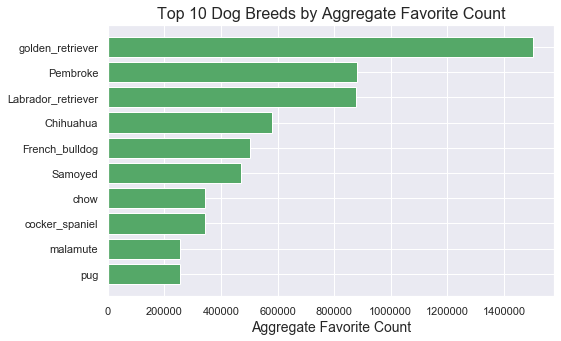

In [538]:
plt.barh(top10_dog_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

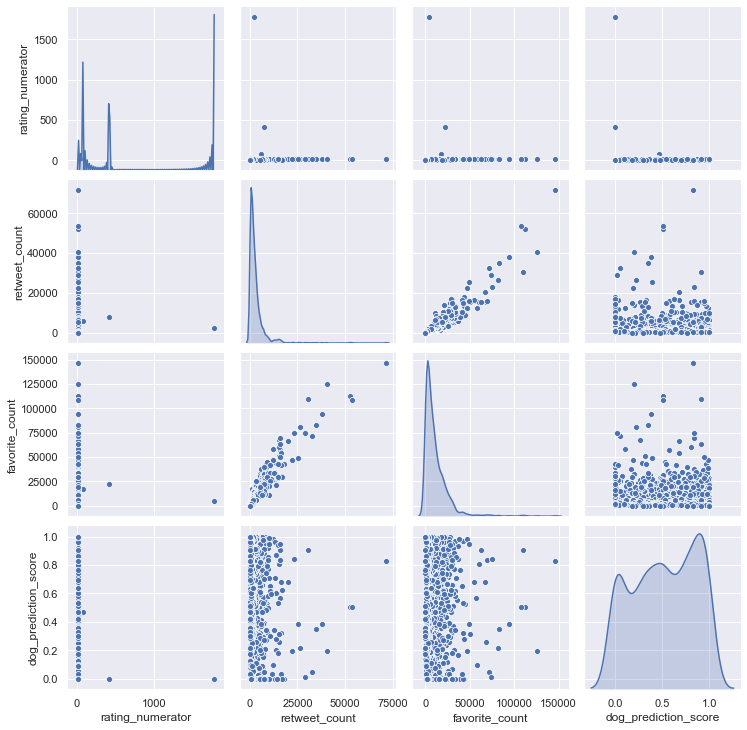

In [539]:
# Draw multiple pairwise bivariate distributions for numeric columns in rate_dogs 
sns.pairplot(rate_dogs, 
             vars = ['rating_numerator', 'retweet_count', 'favorite_count', 'dog_prediction_score'],
             diag_kind = 'kde');

### Insights:
1. Golden Retriever received the maximum amount of attention in terms of tweets

2. Golden Retriever is again the most favoured dog among all the dogs breed whereas Pugs are least favoured

3. Most important factors in determining the famous or favourite are number of retweets, and aggregated favourite count

In [540]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook AirBnB_Project3.ipynb to html',
 '[NbConvertApp] Writing 541396 bytes to AirBnB_Project3.html',
 '[NbConvertApp] Converting notebook NLS.ipynb to html',
 '[NbConvertApp] Writing 349340 bytes to NLS.html',
 '[NbConvertApp] Converting notebook Pandas_Parctise.ipynb to html',
 '[NbConvertApp] Writing 359737 bytes to Pandas_Parctise.html',
 '[NbConvertApp] Converting notebook PySpark-Sheet-1.ipynb to html',
 '[NbConvertApp] Writing 282265 bytes to PySpark-Sheet-1.html',
 '[NbConvertApp] Converting notebook Python_Practice.ipynb to html',
 '[NbConvertApp] Writing 286051 bytes to Python_Practice.html',
 '[NbConvertApp] Converting notebook Storing_data.ipynb to html',
 '[NbConvertApp] Writing 339767 bytes to Storing_data.html',
 '[NbConvertApp] Converting notebook data-wrangling-template.ipynb to html',
 '[NbConvertApp] Writing 977946 bytes to data-wrangling-template.html',
 '[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp